In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

from google.colab import drive
drive.mount('/content/drive')

sys.path.append("/content/drive/MyDrive/GSOC-NMR-project/Work/Notebooks")
from auxillary_functions import *
from polyfeat_imp import *
from polynomial_featextract import poly_featextract

Mounted at /content/drive


In [2]:
# import raw data and params.txt file
datadir_path = "/content/drive/MyDrive/GSOC-NMR-project/Work/Data/2021-06-21_classify_datagen_all_funcs"

rawdata = load_data(datadir_path)
params = load_params(datadir_path)
ker_integrals = load_wlist(datadir_path) # load wlist.txt file

# Stencil type : {'0' : 'Gaussian', '1' : 'Power Law', '2' : 'RKKY'}

Finished loading rawdata into numpy array
Finsihed loading parameters file
finished loading kernel-integrals file.


In [3]:
print(rawdata.shape)
offset = 150
shifted_data, center = get_window(rawdata,2/3,width=offset)
print("The Echo pulse occurs at timestep:",center)

# Rescaled data
rscl_data = shifted_data / np.max(shifted_data,axis=1,keepdims=True)

(10500, 943)
The Echo pulse occurs at timestep: 628


In [4]:
y_classes = get_yclasses(params, ker_integrals)

array([  0,  75, 150, 225, 300])

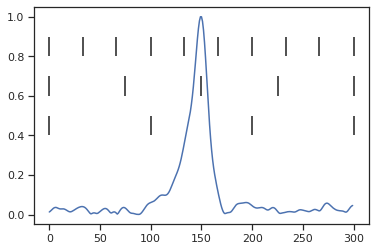

In [13]:
sns.set_style('ticks')
curve = rscl_data[100,:]
fig, ax  = plt.subplots()



ax.plot(curve)
ax.vlines(x=np.linspace(0,300,4).astype(int), ymin=0.4, ymax=0.5)
ax.vlines(x=np.linspace(0,300,5).astype(int), ymin=0.6, ymax=0.7)
ax.vlines(x=np.linspace(0,300,10).astype(int), ymin=0.8, ymax=0.9)





plt.show()